# Lesson 3: Assignment: A New SVR Model

Now that you have built an SVR model, build a new one with fresh data (try one of these datasets from Duke). Annotate your work in a notebook, visualize the data and your model, and test its accuracy using appropriate plots and MAPE. Also try tweaking the different hyperparameters and also using different values for the timesteps.

# Building Support Vector Regression (SVR) on Air Passengers Data

For this example, we'll use the "Air Passengers" dataset, which contains the monthly total number of international airline passengers from 1949 to 1960.

## Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


## Load and preprocess the dataset

In [3]:
# Load the dataset
data = pd.read_csv('AirPassengers.csv')



In [4]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Converting the the month column to the Datetime formart:

In [5]:


# Convert the 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'])


In [6]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


We now extract the time series index and the target variable:

In [8]:
# Extract the time series index and the target variable
dates = data['Month'].values
passengers = data['#Passengers'].values


From this the data can be splitted into training and test sets:

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dates, passengers, test_size=0.2, random_state=42)



Reshaping the features:

In [10]:
# Reshape the features (required by SVR)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)


Normalizing the features to values between 0 and 1:

In [11]:
# Scale the features (optional but often beneficial for SVR)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Reshaping the target  variable:

In [12]:
# Reshape the target variable (required by SVR)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

## Train the SVR model

In [13]:
# Create an instance of SVR
svr = SVR(kernel='rbf')



In [14]:
# Train the SVR model
svr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Evaluate the SVR model

In [15]:
# Predict the target variable for the test set
y_pred = svr.predict(X_test)

In [16]:
# Calculate the mean squared error (MSE) as a metric
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 5614.035648767802


## Visualize the results

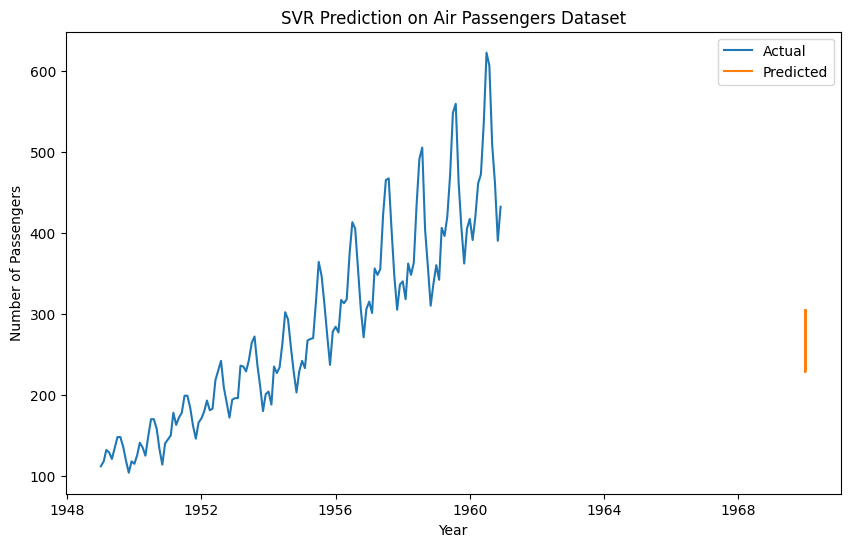

In [17]:
# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(dates, passengers, label='Actual')
plt.plot(X_test, y_pred, label='Predicted')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('SVR Prediction on Air Passengers Dataset')
plt.show()
